In [1]:
#Importing the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Cardiovascular Health Indicators:
#Heart Rate: Typically measured in beats per minute (bpm). Normal resting heart rates range from 60 to 100 bpm. 
Abnormal values might indicate cardiovascular issues.

Blood Pressure: Includes systolic (pressure when the heart beats) and diastolic (pressure when the heart rests between beats). 
Normal ranges are around 120/80 mmHg. High or low blood pressure can be linked to heart disease risk.

CK-MB (Creatine Kinase-MB): An enzyme found in the heart muscle. Elevated levels can indicate heart damage,
such as a myocardial infarction (heart attack).

Troponin: A protein released into the blood when the heart muscle is damaged. It’s a key biomarker for diagnosing heart attacks.

Blood Sugar (Glucose): Elevated levels can indicate diabetes or other metabolic conditions,
which are risk factors for cardiovascular disease.

The heart attack datasets were collected at Zheen hospital in Erbil, Iraq, from January 2019 to May 2019. 
The attributes of this dataset are: age, gender, heart rate, systolic blood pressure, diastolic blood pressure, blood sugar, 
ck-mb and troponin with negative or positive output. 
According to the provided information, the medical dataset classifies 
either heart attack or none. The gender column in the data is normalized: the male is set to 1 and the female to 0. 
The glucose column is set to 1 if it is > 120; otherwise, 0. As for the output, positive is set to 1 and negative to 0.

In [2]:
#Reading and displaying the csv file
heart_df = pd.read_csv("Medicaldataset.csv")
heart_df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,negative
1,20,1,94,98,46,296.0,6.75,1.060,positive
2,56,1,64,160,77,270.0,1.99,0.003,negative
3,66,1,70,120,55,270.0,13.87,0.122,positive
4,54,1,64,112,65,300.0,1.08,0.003,negative


In [6]:
heart_df.shape

(1319, 9)

In [7]:
heart_df.dtypes

Age                           int64
Gender                        int64
Heart rate                    int64
Systolic blood pressure       int64
Diastolic blood pressure      int64
Blood sugar                 float64
CK-MB                       float64
Troponin                    float64
Result                       object
dtype: object

In [9]:
heart_df.isna().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

In [11]:
heart_df.dtypes

Age                           int64
Gender                        int64
Heart rate                    int64
Systolic blood pressure       int64
Diastolic blood pressure      int64
Blood sugar                 float64
CK-MB                       float64
Troponin                    float64
Result                       object
dtype: object

In [13]:
heart_df['Result'].mode().sum()

'positive'

In [16]:
heart_df['Result'].value_counts()

positive    810
negative    509
Name: Result, dtype: int64

In [17]:
results_count = heart_df['Result'].value_counts()

In [18]:
results_count

positive    810
negative    509
Name: Result, dtype: int64

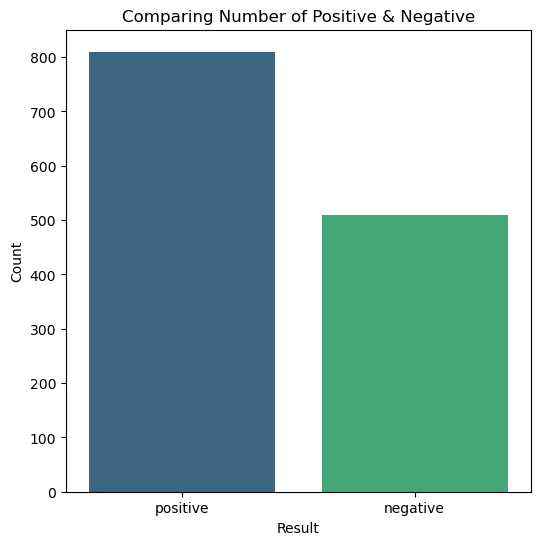

In [21]:
plt.figure(figsize=(6,6))
sns.barplot(x=results_count.index, y=results_count.values, palette='viridis')
plt.xlabel("Result")
plt.ylabel("Count")
plt.title("Comparing Number of Positive & Negative")
plt.show()

In [22]:
heart_df.head(10)

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,negative
1,20,1,94,98,46,296.0,6.75,1.060,positive
2,56,1,64,160,77,270.0,1.99,0.003,negative
3,66,1,70,120,55,270.0,13.87,0.122,positive
4,54,1,64,112,65,300.0,1.08,0.003,negative
5,52,0,61,112,58,87.0,1.83,0.004,negative
6,38,0,40,179,68,102.0,0.71,0.003,negative
7,61,1,60,214,82,87.0,300.00,2.370,positive
8,49,0,60,154,81,135.0,2.35,0.004,negative
9,65,1,61,160,95,100.0,2.84,0.011,negative


# Looking for heart rate between 60 to 100 bpm

In [27]:
normal_heart_rate = heart_df[(heart_df['Heart rate'] >= 60) & (heart_df['Heart rate'] <= 100)]
normal_heart_rate.head(10)

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,negative
1,20,1,94,98,46,296.0,6.75,1.060,positive
2,56,1,64,160,77,270.0,1.99,0.003,negative
3,66,1,70,120,55,270.0,13.87,0.122,positive
4,54,1,64,112,65,300.0,1.08,0.003,negative
5,52,0,61,112,58,87.0,1.83,0.004,negative
7,61,1,60,214,82,87.0,300.00,2.370,positive
8,49,0,60,154,81,135.0,2.35,0.004,negative
9,65,1,61,160,95,100.0,2.84,0.011,negative
10,45,0,60,166,90,102.0,2.39,0.006,negative


In [28]:
#Number of persons with normal heart rate
normal_heart_rate.shape

(1129, 9)

In [29]:
#Checking for Normal distribution and Skewing    
heart_df['Systolic blood pressure'].mean()

127.17058377558757

In [30]:
heart_df['Systolic blood pressure'].median()

124.0

In [31]:
#Checking for Normal distribution and Skewing
heart_df['Diastolic blood pressure'].mean()

72.26914329037149

In [32]:
heart_df['Diastolic blood pressure'].median()

72.0

In [33]:
#Checking for Normal distribution and Skewing
heart_df['Blood sugar'].mean()

146.63434420015165

In [34]:
heart_df['Blood sugar'].median()

116.0

In [35]:
#Checking for Normal distribution and Skewing
heart_df['Troponin'].mean()

0.3609423805913571

In [37]:
heart_df['Troponin'].median()

0.014

In [ ]:
"""THE ABOVE SUGGESTS THAT DIASTOLIC & SYSTOLIC BLOOD PRESSURE HAS NORMAL DISTRIBUTION 
WHILE BLOOD SUGAR & TROPONIN HAS SKEWING DUE TO BIG DIFFERENCE IN MEAN AND MEDIAN """

In [38]:
heart_df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,negative
1,20,1,94,98,46,296.0,6.75,1.060,positive
2,56,1,64,160,77,270.0,1.99,0.003,negative
3,66,1,70,120,55,270.0,13.87,0.122,positive
4,54,1,64,112,65,300.0,1.08,0.003,negative


In [40]:
heart_df.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.193328,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.638173,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [45]:
#The person withe highest heart rate
max_heart_rate_person = heart_df.loc[heart_df['Heart rate'].idxmax()]

In [46]:
max_heart_rate_person

Age                               45
Gender                             1
Heart rate                      1111
Systolic blood pressure          141
Diastolic blood pressure          95
Blood sugar                    109.0
CK-MB                           1.33
Troponin                        1.01
Result                      positive
Name: 63, dtype: object

In [47]:
heart_df['Age'].mean()

56.19332827899924

In [48]:
heart_df['Age'].median()

58.0

Normal Distribution in the AGE column

# Age Distribution in the data set by decade.

In [49]:
age_decade = (heart_df['Age'] // 10) * 10

In [50]:
age_distribution = age_decade.value_counts().sort_index()

In [51]:
age_distribution

10       4
20      49
30      99
40     231
50     316
60     384
70     197
80      32
90       4
100      3
Name: Age, dtype: int64

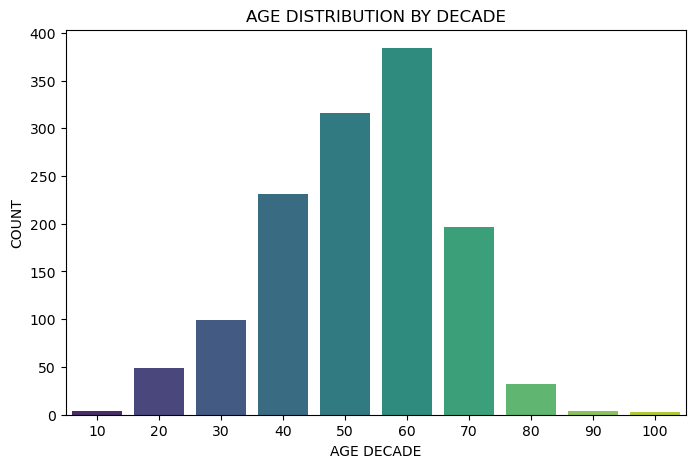

In [56]:
plt.figure(figsize=(8,5))
sns.barplot(x=age_distribution.index, y=age_distribution.values, palette='viridis')
plt.xlabel("AGE DECADE")
plt.ylabel("COUNT")
plt.title("AGE DISTRIBUTION BY DECADE")
plt.show()

# GENDER DISTRIBUTION("1" == MALE; "0" == FEMALE)

In [62]:
heart_df['Gender'].head()

0    1
1    1
2    1
3    1
4    1
Name: Gender, dtype: int64

In [60]:
gender_distribution = heart_df['Gender'].value_counts()

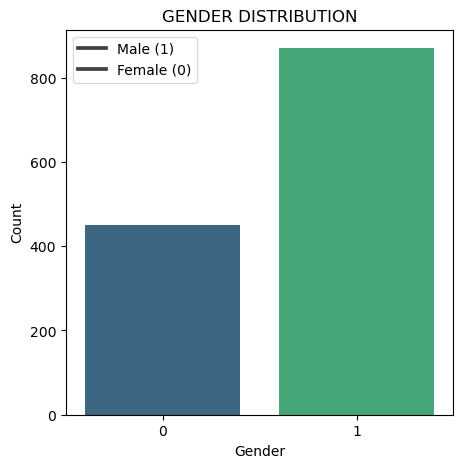

In [64]:
plt.figure(figsize=(5,5))
sns.barplot(x=gender_distribution.index, y=gender_distribution.values, palette='viridis')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("GENDER DISTRIBUTION")
legend_labels = ['Male (1)', 'Female (0)']
plt.legend(legend_labels, loc='upper left', frameon=True, framealpha=0.7)
plt.show()

In [65]:
heart_df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,negative
1,20,1,94,98,46,296.0,6.75,1.060,positive
2,56,1,64,160,77,270.0,1.99,0.003,negative
3,66,1,70,120,55,270.0,13.87,0.122,positive
4,54,1,64,112,65,300.0,1.08,0.003,negative


In [66]:
#Determining correlation between Systolic and Diastolic blood pressure
systolic = heart_df['Systolic blood pressure']
diastolic = heart_df['Diastolic blood pressure']
systolic.corr(diastolic)

0.5861663174462567

In [69]:
#Determining correlation between CK-MB and Troponin
ck_mb = heart_df['CK-MB']
Troponin = heart_df['Troponin']
ck_mb.corr(Troponin)

-0.016008351001196956

In [70]:
#Correlation of heart rates across decades
age_distribution.corr(heart_df['Heart rate'])

0.3448003455240753

In [88]:
heart_df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,negative
1,20,1,94,98,46,296.0,6.75,1.060,positive
2,56,1,64,160,77,270.0,1.99,0.003,negative
3,66,1,70,120,55,270.0,13.87,0.122,positive
4,54,1,64,112,65,300.0,1.08,0.003,negative


In [89]:
gender_distribution

1    870
0    449
Name: Gender, dtype: int64

# Which Gender tends to have more heart rate?

In [91]:
gender_heart_rate = heart_df.groupby('Gender')['Heart rate'].agg(['mean', 'median'])

In [92]:
gender_heart_rate

,mean,median
Gender,,
0,80.260579,75.0
1,77.343678,74.0


Females have a marginally higher mean heart rate than men

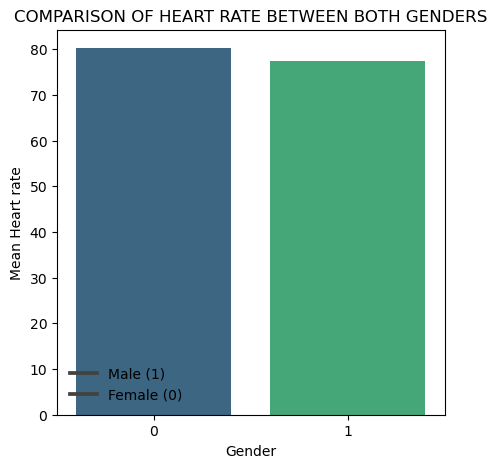

In [95]:
plt.figure(figsize=(5,5))
sns.barplot(x=gender_heart_rate.index, y=gender_heart_rate['mean'], palette='viridis')
plt.xlabel("Gender")
plt.ylabel("Mean Heart rate")
plt.title("COMPARISON OF HEART RATE BETWEEN BOTH GENDERS")
legend_labels = ['Male (1)', 'Female (0)']
plt.legend(legend_labels, loc='lower left', frameon=False, framealpha=0.7)
plt.show()

# Age distribution VS Heart Rate

In [96]:
heart_rate_stat = heart_df.groupby(age_decade)['Heart rate'].agg(['mean', 'median', 'std']).reset_index()

In [97]:
heart_rate_stat

,Age,mean,median,std
0,10,72.250000,69.0,11.672618
1,20,77.653061,79.0,14.942321
2,30,85.111111,74.0,105.226761
3,40,81.142857,76.0,69.588426
4,50,75.117089,73.0,14.166209
5,60,76.119792,73.0,16.466002
6,70,82.319797,76.0,75.266088
7,80,73.562500,72.5,14.515703
8,90,80.500000,69.5,31.352831
9,100,67.333333,60.0,16.289056


In [101]:
normalized_heart_rate = heart_df['Heart rate'] / heart_df['Heart rate'].max()

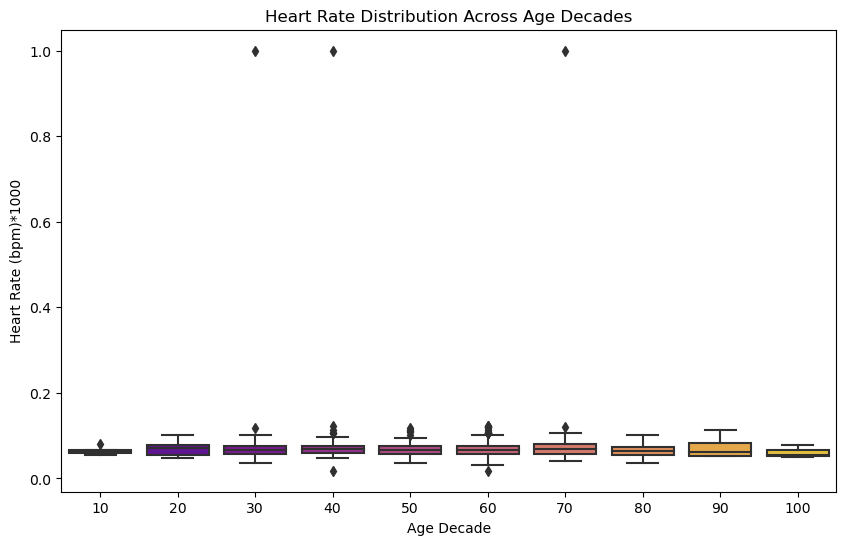

In [102]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=age_decade, y=normalized_heart_rate, data=heart_df, palette='plasma')
plt.title('Heart Rate Distribution Across Age Decades')
plt.xlabel('Age Decade')
plt.ylabel('Heart Rate (bpm)*1000')
plt.show()

Indicates massive/extreme outliers on 30-40, 40-50 and 70-80 range

In [103]:
#Removing the outliers above 1000bpm
filtered_heart_df = heart_df[heart_df['Heart rate'] <= 1000]

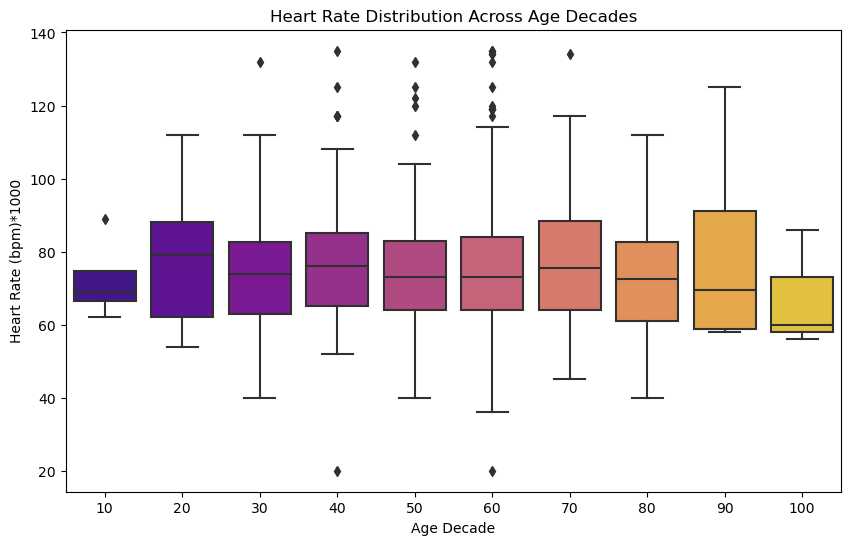

In [105]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=age_decade, y='Heart rate', data=filtered_heart_df, palette='plasma')
plt.title('Heart Rate Distribution Across Age Decades')
plt.xlabel('Age Decade')
plt.ylabel('Heart Rate (bpm)*1000')
plt.show()

Much clearer visualisation indicating right-skewing on 0-10 & 100+ group 

In [109]:
heart_df['Age_decade'] = age_decade

In [111]:
heart_df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result,Age_decade
0,63,1,66,160,83,160.0,1.80,0.012,negative,60
1,20,1,94,98,46,296.0,6.75,1.060,positive,20
2,56,1,64,160,77,270.0,1.99,0.003,negative,50
3,66,1,70,120,55,270.0,13.87,0.122,positive,60
4,54,1,64,112,65,300.0,1.08,0.003,negative,50


# Exploring the outliers and their conditions

In [119]:
# Calculate the IQR, lower bound, and upper bound for each age decade
outliers_dict = {}

for age_group in heart_df['Age_decade'].unique():
    # Filter data for each age decade
    group_data = heart_df[heart_df['Age_decade'] == age_group]['Heart rate']
    
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = group_data.quantile(0.25)
    Q3 = group_data.quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Calculate lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = group_data[(group_data < lower_bound) | (group_data > upper_bound)]
    
    # Add outliers to dictionary
    outliers_dict[age_group] = outliers

# Convert dictionary to a DataFrame for easy visualization
outliers_df = pd.DataFrame(outliers_dict)

# Display the outliers dataframe
outliers_df


,60,20,50,30,40,80,70,90,10,100
21,NaN,NaN,NaN,NaN,135.0,NaN,NaN,NaN,NaN,NaN
30,NaN,NaN,125.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,NaN,NaN,NaN,NaN,1111.0,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,125.0,NaN,NaN,NaN,NaN,NaN
221,120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222,NaN,NaN,122.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,119.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
287,NaN,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN
346,134.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
351,119.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
outliers_df.shape[0]

30

In [125]:
outlier_details = heart_df.loc[outliers_df.index]

In [126]:
#Outliers in relation to Heart rate
outlier_details

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result,Age_decade
21,48,1,135,98,60,100.0,94.790,0.004,positive,40
30,54,1,125,131,82,95.0,1.310,8.300,positive,50
63,45,1,1111,141,95,109.0,1.330,1.010,positive,40
125,47,1,125,121,60,89.0,2.270,0.392,positive,40
221,63,1,120,140,90,100.0,98.480,0.031,positive,60
222,55,1,122,147,95,96.0,3.860,0.005,negative,50
223,63,1,119,170,107,129.0,2.610,0.005,negative,60
287,44,0,117,112,74,113.0,2.640,0.009,negative,40
346,60,1,134,111,69,163.0,3.080,0.025,positive,60
351,69,1,119,113,79,184.0,8.870,0.005,positive,60


In [127]:
outlier_details['Heart rate'].mode()

0    117
1    119
Name: Heart rate, dtype: int64

In [128]:
outlier_details['Heart rate'].mean()

215.26666666666668

In [129]:
outlier_details['Heart rate'].median()

123.5

In [137]:
outlier_details['Heart rate'].max()

1111

In [138]:
top_20_heart_rates = outlier_details.nlargest(20, 'Heart rate')

In [139]:
top_20_heart_rates

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result,Age_decade
63,45,1,1111,141,95,109.0,1.330,1.010,positive,40
717,70,0,1111,141,95,138.0,3.870,0.028,positive,70
1069,32,0,1111,141,95,82.0,2.660,0.008,negative,30
21,48,1,135,98,60,100.0,94.790,0.004,positive,40
682,68,1,135,98,60,96.0,254.400,0.025,positive,60
1012,65,1,135,98,60,162.0,7.670,0.025,positive,60
346,60,1,134,111,69,163.0,3.080,0.025,positive,60
842,63,1,134,111,69,132.0,44.180,0.065,positive,60
1213,76,1,134,111,69,92.0,2.370,0.031,positive,70
457,65,1,132,125,74,196.0,1.420,0.004,negative,60


The above may suggest data entry errors due to unusually high heart rates(1111bpm). Might also indicate duplicates 